## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning

In [2]:
df = pd.read_csv('census_07_2022.csv') # importing csv file as a dataframe

In [3]:
df.head()

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Forgotten Gardens,Laura,White,56,Head,Married,Female,Unemployed,None,Christian
1,1,1,Forgotten Gardens,Elliot,White,57,Husband,Married,Male,"Education officer, community",None,Christian
2,2,1,Forgotten Gardens,Nicole,White,15,Daughter,NaN,Female,Student,None,NaN
3,3,2,Forgotten Gardens,Michelle,John,44,Head,Divorced,Female,"Administrator, arts",None,Christian
4,4,2,Forgotten Gardens,Jeffrey,John,9,Son,NaN,Male,Student,None,NaN


In [4]:
# get information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7773 entries, 0 to 7772
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     7773 non-null   int64 
 1   House Number                   7773 non-null   object
 2   Street                         7773 non-null   object
 3   First Name                     7773 non-null   object
 4   Surname                        7773 non-null   object
 5   Age                            7773 non-null   object
 6   Relationship to Head of House  7773 non-null   object
 7   Marital Status                 5960 non-null   object
 8   Gender                         7773 non-null   object
 9   Occupation                     7773 non-null   object
 10  Infirmity                      7773 non-null   object
 11  Religion                       5910 non-null   object
dtypes: int64(1), object(11)
memory usage: 728.8+ KB


In [5]:
# Checking that the headers are human readable
df = df.drop('Unnamed: 0', axis=1)
df.columns

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

In [6]:
# Removing leading and trailing whitespaces
for col in df:
    df[col] = df[col].str.strip()

In [7]:
df.duplicated().sum()

# No duplicates found

0

In [8]:
# Checking for missing values
df.isna().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1813
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         1863
dtype: int64

In [9]:
# Checking for rows that contain empty strings

for col in df.columns.tolist():
    if '' in df[col].values.tolist():
        print(col + ':', df[col].value_counts()[''], 'row(s)')

First Name: 2 row(s)
Age: 1 row(s)
Relationship to Head of House: 1 row(s)
Marital Status: 1 row(s)
Gender: 1 row(s)
Occupation: 1 row(s)
Infirmity: 6 row(s)
Religion: 3 row(s)


Columns that require a change in data type, includes:<br>
House Number<br>
Age<br>

Columns that contain Null values:<br>
Marital Status<br>
Religion<br>

Columns that contain Empty String:<br>
First Name<br>
Age<br>
Relationship to Head of House<br>
Marital Status<br>
Gender<br>
Occupation<br>
Infirmity<br>
Religion<br>


In [10]:
# Changing empty strings to nan

columns = ['First Name', 'Age', 'Relationship to Head of House',
           'Marital Status', 'Gender', 'Occupation',
           'Infirmity', 'Religion'
          ]

for column in columns:
    df[column].replace('', np.nan, inplace=True)

## Exploring Each Column

### House Number

In [11]:
# checking for non-numerical house numbers
df[~df['House Number'].str.isdigit()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
471,One,Butcher Burgs,Sheila,Stephens,68,Head,Widowed,Female,Retired Logistics and distribution manager,None,Methodist


In [12]:
df['House Number'].replace('One', 1, inplace=True) # correcting error
df['House Number'] = df['House Number'].astype(int) # standardizing column

### First Name

In [13]:
df[df['First Name'].isna()] # exploring empty first name entries

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
267,51,Fish Harbor,NaN,Armstrong,55,None,Single,Male,Unemployed,None,Catholic
6421,19,Wilkins Street,NaN,Clarke,69,Head,Single,Male,Retired Community development worker,None,Christian


In [14]:
df['First Name'].replace(np.nan, 'MISSING', inplace=True)

### Occupation

In [15]:
df[df['Occupation'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
949,16,Newfound Creek,Danielle,Wood,70,Head,Single,Female,NaN,None,Christian


In [16]:
# Given the age, retired will be most approriate

df.at[949, 'Occupation'] = 'Retired'

In [17]:
df['Occupation'].value_counts(dropna=False)

Student                                    1477
University Student                          488
Unemployed                                  481
Child                                       433
PhD Student                                  14
                                           ... 
Retired Administrator, local government       1
Retired Engineer, communications              1
Retired Nurse, adult                          1
Retired Music therapist                       1
Retired Consulting civil engineer             1
Name: Occupation, Length: 1086, dtype: int64

### Age

In [18]:
df_age = df[~(df['Age'].isna())] # exclude NaN float values
df_age = df_age[(~df_age['Age'].str.isdigit())] # check for float strings
df_age

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
358,80,Fish Harbor,Mary,Ward,72.38784457,Head,Married,Female,Retired Hydrologist,None,Christian
359,80,Fish Harbor,Alex,Ward,74.38784457,Husband,Married,Male,Unemployed,None,Christian
5060,5,Kerr Avenue,Lewis,Turner,80.57582061,Head,Married,Male,Retired Haematologist,None,Christian
5061,5,Kerr Avenue,Kirsty,Turner,77.57582061,Wife,Married,Female,Retired Theme park manager,None,None
5062,5,Kerr Avenue,Jodie,Dixon,7.11E-15,Granddaughter,NaN,Female,Child,None,NaN


In [19]:
for idx in df_age.index.tolist():
    # convert string to float, round down float value, then convert to string for data consistency
    
    value = str(np.floor(float(df.iloc[idx]['Age']))) 
    df.at[idx, 'Age'] = value.split('.')[0] # slice the values before the decimal place

In [20]:
# filling in nan values by using Occupation Category

for idx in np.where(df['Age'].isna())[0]:
    if df.iloc[idx]['Occupation'] == 'Child':
        df.at[idx, 'Age'] = df[df['Occupation'] == 'Child']['Age'].median() # median age of children
    elif df.iloc[idx]['Occupation'] == 'Student':
        df.at[idx, 'Age'] = df[df['Occupation'] == 'Student']['Age'].median() # median age of students
    else:
        df.at[idx, 'Age'] = df[df['Age'] >= 18]['Age'].mean() # median age of the adult population

In [21]:
df['Age'] = df['Age'].astype(int)

### Relationship to Head of House

In [22]:
df[df['Relationship to Head of House'].isna()] # checking for null values

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2240,19,Norwich Cliffs,Emily,Hill,19,NaN,Single,Female,University Student,None,None


In [23]:
df['Relationship to Head of House'].value_counts(dropna=False) # Relationship to Head of House Categories

Head                     2912
Son                      1273
Daughter                 1215
Husband                   803
None                      474
Wife                      291
Lodger                    274
Partner                   223
Grandson                   66
Granddaughter              56
Sibling                    42
Cousin                     32
Visitor                    27
Step-Son                   24
Adopted Son                17
Step-Daughter              16
Neice                      10
Nephew                      9
Adopted Daughter            7
Adopted Granddaughter       1
NaN                         1
Name: Relationship to Head of House, dtype: int64

In [24]:
df[(df['Street'] == 'Norwich Cliffs') & (df['House Number'] == 19)] # Checking the household of index 2240

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2237,19,Norwich Cliffs,Carl,Davies,42,Head,Single,Male,"Therapist, nutritional",Physical Disability,None
2238,19,Norwich Cliffs,Donald,Thornton,40,None,Single,Male,Teaching laboratory technician,None,Christian
2239,19,Norwich Cliffs,Cheryl,Murphy,59,None,Single,Female,Fisheries officer,None,None
2240,19,Norwich Cliffs,Emily,Hill,19,NaN,Single,Female,University Student,None,None


In [25]:
df.at[2240, 'Relationship to Head of House'] = 'None' # Changing nan value to 'None' based on household compostion 

In [26]:
df['Relationship to Head of House'].replace('Neice', 'Niece', inplace=True) # correcting spelling error

In [27]:
df['Relationship to Head of House'].value_counts(dropna=False) # Displaying standardized categories

Head                     2912
Son                      1273
Daughter                 1215
Husband                   803
None                      475
Wife                      291
Lodger                    274
Partner                   223
Grandson                   66
Granddaughter              56
Sibling                    42
Cousin                     32
Visitor                    27
Step-Son                   24
Adopted Son                17
Step-Daughter              16
Niece                      10
Nephew                      9
Adopted Daughter            7
Adopted Granddaughter       1
Name: Relationship to Head of House, dtype: int64

### Marital Status

In [28]:
# To display 'Marital Status' categories
df['Marital Status'].value_counts(dropna=False)

Single      2660
Married     2193
NaN         1814
Divorced     695
Widowed      395
D              7
W              5
M              3
S              1
Name: Marital Status, dtype: int64

In [29]:
# all ages below 16 should have no marital status
df.loc[df['Age'] < 16, 'Marital Status'] = 'NA'

In [30]:
# standardizing Marital Status categories
df['Marital Status'].replace({'S':'Single', 'M':'Married', np.nan: 'Unknown', 
                              'D': 'Divorced', 'W': 'Widowed'}, inplace=True)

In [31]:
df['Marital Status'].value_counts(dropna=False) # display standardized categories

Single      2661
Married     2196
NA          1597
Divorced     702
Widowed      400
Unknown      217
Name: Marital Status, dtype: int64

### Gender

In [32]:
# display Gender categories
df['Gender'].value_counts(dropna=False)

Female    3889
Male      3566
female     100
M           82
m           81
male        27
F           16
f           11
NaN          1
Name: Gender, dtype: int64

In [33]:
# creating a dictionary of like genders
gender_dict = {'Male': ['male', 'm', 'M'], 'Female': ['female', 'f', 'F']}

In [34]:
# updating Gender column with uniform values: 'Female' and 'Male'
for k in gender_dict:
    df['Gender'].replace(to_replace=gender_dict[k], value=k, inplace=True)

In [35]:
# Checking for null values
df[df['Gender'].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5394,13,Simpson Flats,Antony,Welch-Martin,61,Husband,Married,NaN,"Psychologist, prison and probation services",None,Catholic


In [36]:
''' Since data was collected in 1881 and the above subset indicates relationship to HOD as "Husband", 
    it is safe to assume that Gender is "Male" '''

df.at[5394, 'Gender'] = 'Male'

In [37]:
# Display standardized genders
df['Gender'].value_counts(dropna=False)

Female    4016
Male      3757
Name: Gender, dtype: int64

### Infirmity

In [38]:
# Display Infirmity categories
df['Infirmity'].value_counts(dropna=False)

None                   7721
Unknown Infection        10
Blind                    10
Physical Disability       8
Disabled                  7
NaN                       6
Mental Disability         6
Deaf                      5
Name: Infirmity, dtype: int64

In [39]:
# Impute null values with statistical mode
df['Infirmity'].replace(np.nan, df['Infirmity'].mode().iloc[0], inplace=True)

In [40]:
# Display Infirmity standardized categories
df['Infirmity'].value_counts(dropna=False)

None                   7727
Unknown Infection        10
Blind                    10
Physical Disability       8
Disabled                  7
Mental Disability         6
Deaf                      5
Name: Infirmity, dtype: int64

### Religion

In [41]:
# Display Religion categories 
df['Religion'].value_counts(dropna=False)

None         2594
NaN          1866
Christian    1813
Catholic      805
Methodist     491
Muslim        100
Sikh           60
Jewish         36
Bahai           2
Private         2
Buddist         1
Sith            1
Baptist         1
Orthodoxy       1
Name: Religion, dtype: int64

In [42]:
# Persons below 16 are not required to have a religion.
# Set Religion of > 16 Age to 'None'
df.loc[df['Age'] < 16, 'Religion'] = 'None'

In [43]:
# replacing nan values with the statistical mode of religion
df['Religion'].replace(np.nan, df['Religion'].mode().iloc[0], inplace=True)

In [44]:
# replacing incorrect entries with none
df['Religion'].replace(['Private', 'Sith'], 'None', inplace=True)

In [45]:
# Display Religion standardized categories
df['Religion'].value_counts(dropna=False)

None         4463
Christian    1813
Catholic      805
Methodist     491
Muslim        100
Sikh           60
Jewish         36
Bahai           2
Buddist         1
Baptist         1
Orthodoxy       1
Name: Religion, dtype: int64

## Checking for inaccurate data 

In [46]:
# Checking for age less than 0
df[df['Age'] < 0]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [47]:
# checking for underage marriage 
df[(df['Marital Status'] == 'NA') & (df['Age'] > 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [48]:
# checking for adult who have no entry for marital status
df[(df['Marital Status'] != 'NA') & (df['Age'] < 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
41,4,Quayside Drive,Melanie,Morgan,16,Daughter,Unknown,Female,Student,None,None
42,4,Quayside Drive,Samuel,Morgan,16,Son,Unknown,Male,Student,None,None
43,4,Quayside Drive,Joanne,Morgan,16,Daughter,Unknown,Female,Student,None,None
52,9,Quayside Drive,Dorothy,Smith,16,Daughter,Unknown,Female,Student,None,None
200,34,Fish Harbor,Lydia,O'Brien,17,Daughter,Unknown,Female,Student,None,None
...,...,...,...,...,...,...,...,...,...,...,...
7693,27,North Glens,Hilary,Barnett,17,Daughter,Unknown,Female,Student,None,None
7703,1,William Citadel,Gregory,Bibi,16,Son,Unknown,Male,Student,None,None
7710,1,Coronation Rocks,Howard,Richardson,17,Son,Unknown,Male,Student,None,None
7721,1,Smith Manor,Holly,Little,16,Daughter,Unknown,Female,Student,None,None


In [49]:
# checking for 'children 'greater than 18 years
df[(df['Occupation'] == 'Child') & (df['Age'] > 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [50]:
# checking that all minors below the age of 4 is categorized as 'Child'
df[(df['Occupation'] != 'Child') & (df['Age'] < 4)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [51]:
# checking that all minors between 4 and 18 have been categorized correctly
df[(df['Occupation'] != 'Student') & (df['Age'] > 4) & (df['Age'] < 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5607,1,Kielder Avenue,Joanna,Webb,16,Head,Single,Female,Unemployed,None,None


## Identifying outliers

In [52]:
print('Maximum Age: ', df['Age'].max()) # Maximum Age

Maximum Age:  105


In [53]:
# Early Retirement
df[(df['Occupation'].str.contains('Retired')) & (df['Age'] < 65)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [54]:
# Late Retirement
df[(~df['Occupation'].str.contains('Retired')) & (df['Age'] > 64)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
45,6,Quayside Drive,Teresa,Wilson,65,Head,Divorced,Female,Industrial buyer,None,None
49,8,Quayside Drive,Nicola,Smith,66,Wife,Married,Female,Medical secretary,None,None
75,18,Quayside Drive,Sarah,Dunn,66,Head,Widowed,Female,"Production assistant, radio",None,None
288,58,Fish Harbor,Kyle,Ross,67,Husband,Married,Male,Sales promotion account executive,None,None
359,80,Fish Harbor,Alex,Ward,74,Husband,Married,Male,Unemployed,None,Christian
...,...,...,...,...,...,...,...,...,...,...,...
7567,25,Ebor Drive,Georgia,Norris,66,Head,Widowed,Female,Theatre manager,None,Christian
7588,41,Ebor Drive,Deborah,Jones,68,Head,Widowed,Female,Unemployed,None,Christian
7592,44,Ebor Drive,Frances,Jones,74,Head,Widowed,Female,Unemployed,None,None
7600,49,Ebor Drive,Edward,Allan,66,Head,Divorced,Male,Cartographer,None,Christian


In [55]:
# Finding the number of Unemployed Seniors

senior_unemp = len(df[(df['Occupation'] == 'Unemployed') & (df['Age'] > 64)])
print('Number of unemployed seniors: ', senior_unemp)

Number of unemployed seniors:  39


In [56]:
# changing unemployed seniors to 'Retired'

df.loc[(df['Occupation'] == 'Unemployed') & (df['Age'] > 64), 'Occupation'] = 'Retired'

In [57]:
# Checking for Head of House less than 18 years
df[(df['Relationship to Head of House'] == 'Head') & (df['Age'] < 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2033,6,Chester Street,Anne,Thomson,16,Head,Married,Female,Student,None,None
5607,1,Kielder Avenue,Joanna,Webb,16,Head,Single,Female,Unemployed,None,None


In [58]:
# Displaying the household of index 2033
df[(df['Street'] == 'Chester Street') & (df['House Number'] == 6)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2033,6,Chester Street,Anne,Thomson,16,Head,Married,Female,Student,None,None
2034,6,Chester Street,Brandon,Thomson,19,Husband,Married,Male,University Student,None,None
2035,6,Chester Street,Steven,Thomson,0,Son,NA,Male,Child,None,None
2036,6,Chester Street,Lynne,Thomson,0,Daughter,NA,Female,Child,None,None
2037,6,Chester Street,Karen,Rees,53,Lodger,Divorced,Female,Public house manager,None,Methodist


In [59]:
# Displaying the household of index 5607
df[(df['Street'] == 'Kielder Avenue') & (df['House Number'] == 1)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5607,1,Kielder Avenue,Joanna,Webb,16,Head,Single,Female,Unemployed,None,None
5608,1,Kielder Avenue,Martyn,Webb,0,Son,NA,Male,Child,None,None


In [60]:
# cleaned data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7773 entries, 0 to 7772
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7773 non-null   int32 
 1   Street                         7773 non-null   object
 2   First Name                     7773 non-null   object
 3   Surname                        7773 non-null   object
 4   Age                            7773 non-null   int32 
 5   Relationship to Head of House  7773 non-null   object
 6   Marital Status                 7773 non-null   object
 7   Gender                         7773 non-null   object
 8   Occupation                     7773 non-null   object
 9   Infirmity                      7773 non-null   object
 10  Religion                       7773 non-null   object
dtypes: int32(2), object(9)
memory usage: 607.4+ KB


In [61]:
# Exporting cleaned data
df.to_csv('census_07_2022_clean.csv', index = False)

## Data Analysis

In [62]:
# importing cleaned data set
dtf = pd.read_csv('census_07_2022_clean.csv', keep_default_na=False)
dtf.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Forgotten Gardens,Laura,White,56,Head,Married,Female,Unemployed,None,Christian
1,1,Forgotten Gardens,Elliot,White,57,Husband,Married,Male,"Education officer, community",None,Christian
2,1,Forgotten Gardens,Nicole,White,15,Daughter,NA,Female,Student,None,None
3,2,Forgotten Gardens,Michelle,John,44,Head,Divorced,Female,"Administrator, arts",None,Christian
4,2,Forgotten Gardens,Jeffrey,John,9,Son,NA,Male,Student,None,None


### Adding more Features

In [63]:
# making a copy of the dataset for manipulation
df = dtf.copy()

In [64]:
# Adding an address column
df['Address'] = df['House Number'].astype(str) + ' ' + df['Street']

In [65]:
# Adding an No of House Occupants column
df['No of House Occupants'] = df.apply(lambda row : 
                                         len(df[(df['House Number'] == row['House Number'])  
                                         & (df['Street'] == row['Street'])]), axis = 1)

In [66]:
# Recategorizing 'Occupation' column
lis = ["Unemployed", "Child", "Retired", "University Student", "Student", 'PhD Student'] # list of categories
df.loc[df['Occupation'].str.contains('Retired'), 'Occupation'] = 'Retired' # Categorizing 'Retired' population
df.loc[~(df['Occupation'].isin(lis)), 'Occupation'] = 'Employed' # Categorizing 'Employed' population

In [67]:
# Defining a function to group Ages by 5 years intervals

def age_category(row):
    age_groups = [i for i in range(4, df.Age.max()+5, 5)]
    for i in age_groups:
        lower_age = i-4
        upper_age = i
        if row['Age'] >= lower_age and row['Age'] <= upper_age:
            return f'{lower_age}-{upper_age}'

In [68]:
# Using the age_category function to create a new column 'Age Band'
df['Age Band'] = df.apply(lambda row: age_category(row), axis=1)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7773 entries, 0 to 7772
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7773 non-null   int64 
 1   Street                         7773 non-null   object
 2   First Name                     7773 non-null   object
 3   Surname                        7773 non-null   object
 4   Age                            7773 non-null   int64 
 5   Relationship to Head of House  7773 non-null   object
 6   Marital Status                 7773 non-null   object
 7   Gender                         7773 non-null   object
 8   Occupation                     7773 non-null   object
 9   Infirmity                      7773 non-null   object
 10  Religion                       7773 non-null   object
 11  Address                        7773 non-null   object
 12  No of House Occupants          7773 non-null   int64 
 13  Age

### Data Exploration & Calculations

#### Summary Statistics

In [70]:
import pandas_profiling
profile = df.profile_report(title='Census Data Report')
profile.to_file(output_file="census_profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [71]:
df.describe()

,House Number,Age,No of House Occupants
count,7773.000000,7773.000000,7773.000000
mean,30.491316,36.501608,3.861958
std,36.500214,21.837111,2.751617
min,1.000000,0.000000,1.000000
25%,9.000000,19.000000,2.000000
50%,20.000000,36.000000,3.000000
75%,36.000000,52.000000,5.000000
max,221.000000,105.000000,22.000000


#### Commuters
N.B: The cell below generates a new sample every time it runs. Sample was exported as a csv file to properly analyse occupations.

In [72]:
# sample size should be around 10% of the population

# df_workers = df[df['Occupation'] == 'Employed'] 
# n = int(round(0.1 * len(df_workers), 0))
# sample = df_workers.sample(n=n)

# sample = dtf[dtf.index.isin(sample.index.tolist())]['Occupation'].value_counts()
# sample = sample.rename_axis('job').reset_index(name='count')

# sample['job'] = sample['job'].apply(str.lower)
# sample.to_csv('sample.csv', index = False)

In [73]:
# importing sample file as a data frame.
sample = pd.read_csv('sample.csv', keep_default_na=False)
sample.head() # display first 5 rows

,job,count
0,learning disability nurse,4
1,ergonomist,3
2,medical sales representative,3
3,systems analyst,3
4,quantity surveyor,3


In [74]:
# defining keywords for city jobs and town jobs.
non_commute_words = ['disability', 'learning', 'teach', 'education', 'lib', 'manager',
                     'gov', 'community','language', 'writer', 'support', 'customer', 
                     'hotel', 'public', 'officer', 'social', 'worker', 'home', 'nurse',
                     'furniture', 'book', 'editor', 'comptroller', 'brewer', 'radio',
                     'general practice', 'bank', 'dietitian', 'osteopath', 'charity',
                     'health', 'retail', 'barista', 'barrister', 'agric', 'trade', 'warehouse']

commute_words = ['developer', 'archaeologist', 'hospital', 'information', 'computer',
                 'programmer', 'industrial', 'television', 'scientist', 'surveyor',
                 'medical', 'systems', 'director', 'animator', 'publish',
                 'financial', 'freight', 'warden', 'adviser', 'consult', 'executive',
                 'editor', 'translator', 'estate', 'sales', 'film', 'inspector', 
                 'licensed conveyance','museum', 'surgeon', 'scien', 'analyst', 
                 'chartered', 'corporate', 'technical', 'data', 'researcher', 
                 'airline', 'insurance', 'representative', 'practitioner', 'attorney',
                 'solicitor', 'actor', 'civil service fast streamer', 'lexicographer',
                 'mudlogger', 'university', 'broker', 'engineer', 'designer', 'ist']

In [75]:
# function to assign jobs to commute, non_commute and 'None' categories
def check_job(job):
    if any(word in job for word in non_commute_words):
        return 'non_commute'
    elif any(word in job for word in commute_words):
        return 'commute'
    else:
        return 'None'

In [76]:
# Creating a new category column by applying check_job function to Job column.
sample['commute_or_not'] = sample.apply(lambda row: check_job(row['job']), axis=1)

In [77]:
# Checking for jobs that were unsuccessfully categorized
sample[sample['commute_or_not'] == 'None']

,job,count,commute_or_not
137,make,1,None
167,land,1,None
214,copy,1,None
273,sub,1,None


In [78]:
# Checking the number of rows that belong to each 'commute_or_not' category
sample['commute_or_not'].value_counts()

commute        176
non_commute    131
None             4
Name: commute_or_not, dtype: int64

In [79]:
# Optimizing value count by putting count into consideration
commute_df = sample.groupby('commute_or_not')['count'].sum().rename_axis('commute_or_not').reset_index(name='count')
commute_df

,commute_or_not,count
0,None,4
1,commute,233
2,non_commute,177


In [80]:
# Calculating the percentage of commuting jobs out of sample size

per_comm = round((commute_df.iloc[1]['count']/sample['count'].sum() * 100), 0)
print('Percentage of commuting jobs in sample: ', per_comm)

Percentage of commuting jobs in sample:  56.0


In [81]:
# translating the percentage to the entire occupation population
work_com = 0.56*len(df[df['Occupation'] == 'Employed'])

# getting the number of students 
stu_com = len(df[df['Occupation'] == 'University Student'])

print('Percentage of commuting jobs in population: ', round((work_com/len(df) * 100), 0))

Percentage of commuting jobs in population:  30.0


In [82]:
# calculating the percentage of total commuters in the town population.
commute_per = round(((work_com + stu_com)/len(df) * 100), 0)
print('Percentage of commuters in population: ', commute_per)

Percentage of commuters in population:  36.0


#### Population Growth Estimate

In [83]:
# Population Growth
# Crude Birth Rate

br = len(df[df['Age'] == 0])/len(df) * 1000
br = round(br, 2)


In [84]:
# Defining a function to find the population difference between two age bands. 
# An argument is taken to define start age. In this case from Age 56

def age_band_diff(age):
    return (len(df[(df['Age'] >= age) \
                  & (df['Age'] <= (age+4))]) \
                  - len(df[(df['Age'] >= (age+5)) \
                  & (df['Age'] <= (age+9))]))/5 # divided by 5 to account for 5 year age groups

In [85]:
# a list of age group population differences

diff = [age_band_diff(i) for i in range(65, 110, 5)]
print('List of age group population differences: ', diff)

List of age group population differences:  [0.2, 14.2, 11.8, 10.0, 12.2, 0.4, 0.4, 1.4, 0.2]


In [86]:
# calculating death rate per 1000

dr = round((sum(diff)/len(df) * 1000), 2)

In [87]:
# Immigration

imm = df[(df['Relationship to Head of House'].isin(['Lodger', 'Visitor'])) \
       & (df['Marital Status'].isin(['Single', 'Widowed'])) \
       & (df['Occupation'] != 'University Student')]

imm = round((len(imm)/len(df) * 1000),2)

In [88]:
# Extracting number of divorcees per gender from the dataset (excluding students).

em = df[(df['Marital Status'] == 'Divorced') & \
       ((df['Occupation'] != 'University Student'))]['Gender'].value_counts() 

In [89]:
# Calculating the difference between female and male divorcee count and finding rate per 1000 population

em = (em.values[0] - em.values[1])/len(df) * 1000
em = round(em, 2)

In [90]:
# Population Growth

PG = ((br + imm) - (dr + em))*0.1
PG = round((PG), 2)

In [91]:
# Displaying all parameters

print('Crude Birth Rate per 1000: ', br)
print('Crude Death Rate per 1000: ', dr)
print('Net Immigration per 1000: ', imm)
print('Net Emigration per 1000: ', em)
print(f'% Population Growth: {PG}%')

Crude Birth Rate per 1000:  7.59
Crude Death Rate per 1000:  6.54
Net Immigration per 1000:  26.5
Net Emigration per 1000:  23.93
% Population Growth: 0.36%


#### Unemployment Rate

In [92]:
# % Unemployment 

unemp = len(df[df['Occupation'] == 'Unemployed'])/len(df[(df['Age'] >= 16) & (df['Age'] <= 64)]) * 100
print('Unemployment Rate: ', unemp)

Unemployment Rate:  8.403041825095057


In [93]:
# % Employment 

emp = len(df[df['Occupation'] == 'Employed'])/len(df[(df['Age'] >= 16) & (df['Age'] <= 64)]) * 100
print('Employment Rate: ', emp)

Employment Rate:  78.76425855513308


#### Retirement

In [94]:
# Calculationg Percentage of Delayed/late retirement 

ret = len(df[(df['Occupation'] != 'Retired') & (df['Age'] > 65)])/len(df[df['Age'] > 65]) * 100
print('Percentage of Delayed Retirement: ', ret)

Percentage of Delayed Retirement:  10.635838150289018


#### Infirmity

In [95]:
# Calculating the percentage of Infirmity across the population

inf = len(df[df['Infirmity'] != 'None'])/len(df)*100
print(f'Percentage of Infirmity Cases: {round(inf, 2)}%')

Percentage of Infirmity Cases: 0.59%


#### Marital Status Percentage

In [96]:
df[(df['Age'] > 15) & (df['Marital Status'] == 'NA')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,No of House Occupants,Age Band


In [97]:
# Computing the percentage of each marital status out of population aged over 15. 

status = df['Marital Status'].unique().tolist()
status.remove('NA')
t = len(df[df['Age'] > 15])

for s in status:
    p = len(df[df['Marital Status'] == s])/t * 100
    print(f'Percentage {s}: {round(p, 1)}%')

Percentage Married: 35.6%
Percentage Divorced: 11.4%
Percentage Widowed: 6.5%
Percentage Single: 43.1%
Percentage Unknown: 3.5%


In [98]:
# finding the average number of occupants in divorcee homes

mod = df[df['Marital Status'] == 'Divorced']['No of House Occupants'].mode()
med = df[df['Marital Status'] == 'Divorced']['No of House Occupants'].median()

print(f'Mode: {mod[0]}\nMedian: {med}')

Mode: 1
Median: 3.0


#### Household Statistics

In [99]:
# calculating some features on housing 

# number of houses using length of unique addresses
houses = len(df['Address'].unique()) 

# getting the dataset of family members in the population
family = df[~df['Relationship to Head of House'].isin(['None', 'Lodger', 'Visitor', 'Head'])]

# number of family houses 
fam_houses = len(family['Address'].unique())

# computing percentage of households
fam_per = fam_houses/houses * 100 

# computing ratio of family members to households.
fam_rt = len(family)/fam_houses 

# printing outputs
print(f'Number of Total Houses: {houses} \
        \nNumber of family households: {fam_houses} \
        \nPercentage of family households: {round(fam_per, 0)}% \
         \nNo of family members per household: {round(fam_rt, 0)}')

Number of Total Houses: 2912         
Number of family households: 1869         
Percentage of family households: 64.0%          
No of family members per household: 2.0


### Data Visualization

In [100]:
save_fig = {}

In [101]:
# a function to group categorical data by making them headers and their counts, the corresponding row values. 
# The function takes the column to be counted by age group as a parameter.

def group_by_age(column):
    age_groups = [i for i in range(4, df.Age.max()+5, 5)] # creating age bands
    category = df[column].unique().tolist() # extracting categorical headers
    data_ = []
    
    for age in age_groups:
        subset = df[(df['Age'] >= age-4) & (df['Age'] <= age)]
        data_list = [f'{age-4}-{age}'] + [len(subset[subset[column] == c]) for c in category]
        
        data_.append(data_list)
    
    columns = ['Age Range'] + category

    _df = pd.DataFrame(data_, columns=columns) # converting to data frame.
    
    return _df

### Population Pyramid

In [102]:
# grouping gender count by age bands
age_df = group_by_age('Gender')

In [103]:
age_df # display age-gender dataframe

,Age Range,Female,Male
0,0-4,198,235
1,5-9,265,262
2,10-14,233,302
3,15-19,280,286
4,20-24,279,278
5,25-29,287,264
6,30-34,291,262
7,35-39,381,285
8,40-44,333,295
9,45-49,323,252


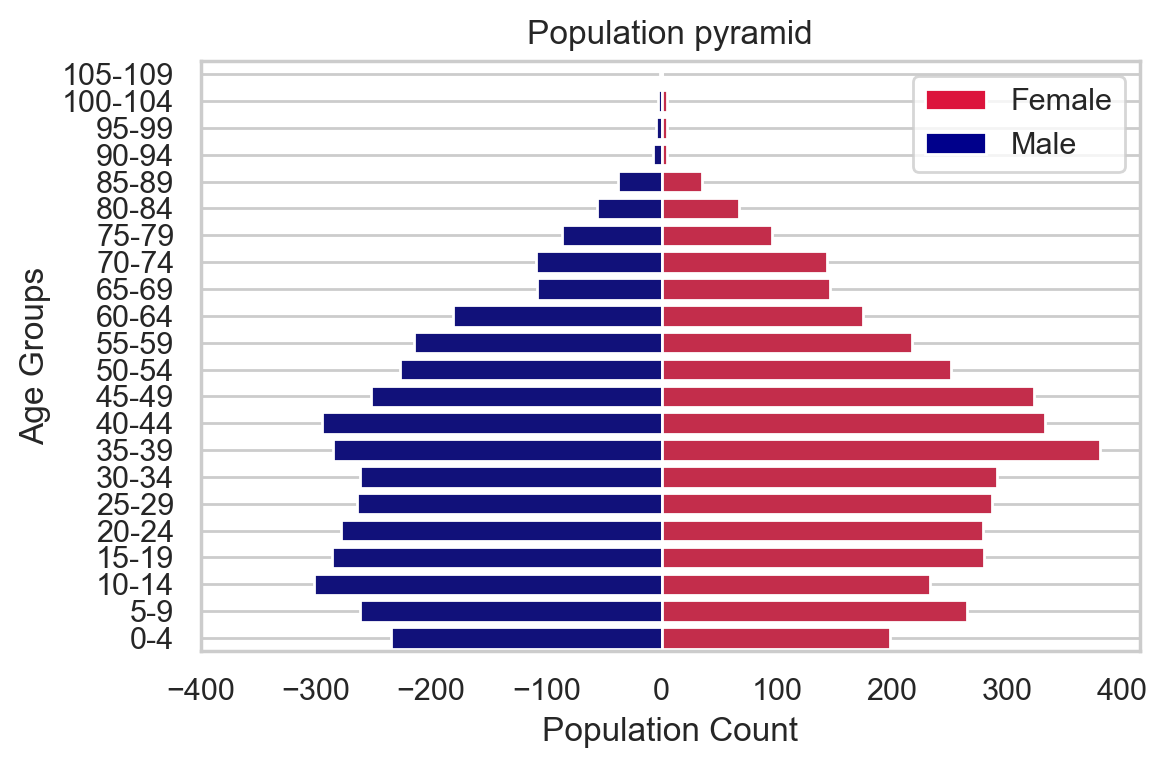

In [104]:
# Plotting a population pyramid 

from matplotlib.patches import Patch

sns.set(style="whitegrid")
plt.figure(dpi=200)

population_pyramid = sns.barplot(x=age_df['Male']*-1, 
                                 y='Age Range', 
                                 data=age_df, 
                                 order=age_df['Age Range'][::-1], 
                                 color="darkblue"
                                )

population_pyramid = sns.barplot(x='Female', 
                                 y='Age Range', 
                                 data=age_df, 
                                 order=age_df['Age Range'][::-1], 
                                 color="crimson"
                                )


plt.title("Population pyramid")
plt.xlabel("Population Count")
plt.ylabel("Age Groups")
gender_color = {'Female': 'crimson', 'Male': 'darkblue'}
legend_elements = [Patch(facecolor=gender_color[gen], label=gen) for gen in gender_color]
plt.legend(handles=legend_elements)
plt.grid()

plt.xticks(ticks=[i for i in range(-400, 500, 100)])
plt.tight_layout()
plt.show()

save_fig['./population_pyramid.png'] = population_pyramid

### Occupation Trend

In [105]:
# Finding the median age of unemployed population

unemp = df[df['Occupation'] == 'Unemployed']['Age'].median()
print('Median Age of Unemployed Population: ', unemp)

Median Age of Unemployed Population:  42.0


In [106]:
# grouping occupation category counts by age bands

occupation_df = group_by_age('Occupation')

In [107]:
occupation_df

,Age Range,Unemployed,Employed,Student,Retired,Child,University Student,PhD Student
0,0-4,0,0,0,0,433,0,0
1,5-9,0,0,527,0,0,0,0
2,10-14,0,0,535,0,0,0,0
3,15-19,2,4,415,0,0,145,0
4,20-24,20,192,0,0,0,343,2
5,25-29,48,493,0,0,0,0,10
6,30-34,54,497,0,0,0,0,2
7,35-39,70,596,0,0,0,0,0
8,40-44,66,562,0,0,0,0,0
9,45-49,64,511,0,0,0,0,0


<Figure size 1200x800 with 0 Axes>

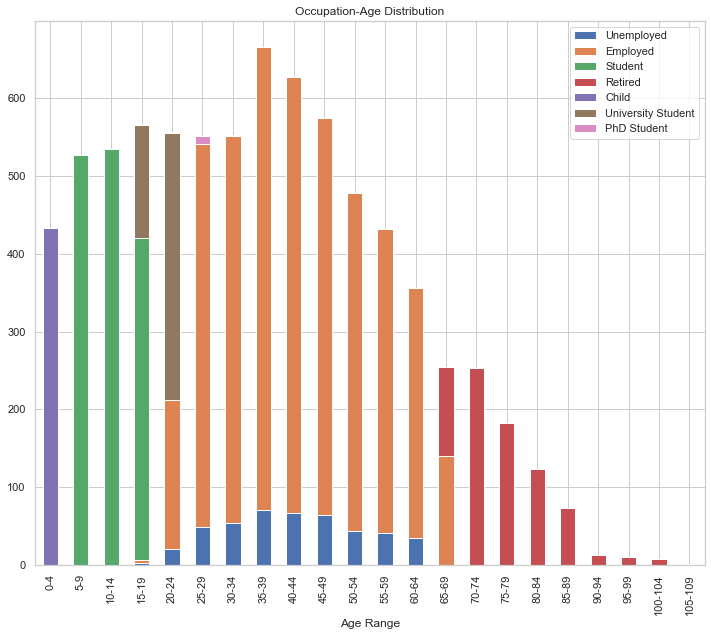

In [108]:
# plotting a simple bar chart with derived data frame to show occupation ditribution across age groups.

sns.set(style="whitegrid")
plt.figure(dpi=200)
occupation_plot = occupation_df.plot(figsize=(12,10), kind='bar', x='Age Range', stacked=True)
plt.title('Occupation-Age Distribution')  
plt.show()

save_fig['./occupation_plot.png'] = occupation_plot

### Religion 

In [109]:
# Finding the median age of all religion followers

df[['Religion', "Age"]].groupby("Religion").median()

,Age
Religion,
Bahai,43.0
Baptist,24.0
Buddist,26.0
Catholic,41.0
Christian,52.0
Jewish,46.0
Methodist,42.0
Muslim,31.0
None,24.0


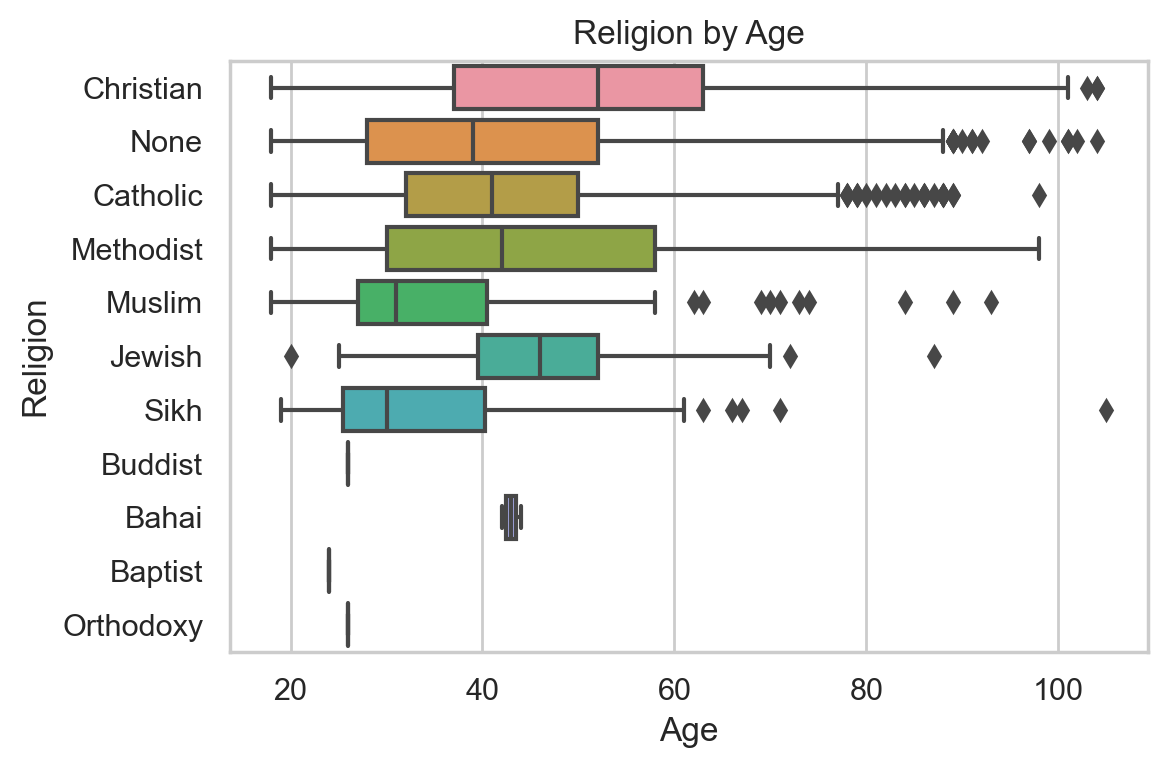

In [110]:
# Plotting a boxplot of Ages against Religion 

plt.figure(dpi=200)
religion_plot = sns.boxplot(data=df[df['Age'] >= 18], x='Age', y='Religion')
plt.title('Religion by Age')
plt.tight_layout()
plt.show()

save_fig['./religion_plot.png'] = religion_plot

### Infirmity & Retirement

In [111]:
# Finding the median age of all Infirmities  

df[['Infirmity', "Age"]].groupby("Infirmity").median()

,Age
Infirmity,
Blind,25.5
Deaf,51.0
Disabled,18.0
Mental Disability,45.0
None,36.0
Physical Disability,37.5
Unknown Infection,26.0


In [112]:
# Checking the no of occupants in the homes of Retirees 

df[df['Occupation'] == 'Retired']['No of House Occupants'].value_counts().rename_axis('No of Occupants').reset_index(name='count of retirees')

,No of Occupants,count of retirees
0,1,324
1,2,296
2,3,55
3,4,38
4,5,32
5,6,10
6,18,8
7,11,4
8,10,3
9,15,2


### Housing Density by Marital Status

In [113]:
# Checking for homes that have no head of house 

address = df['Address'].unique().tolist() # making a list of all houses
empty_address = [] # to be used to collect addresses with no head of house

for add in address:
    if df[(df['Address'] == add) & (df['Relationship to Head of House'] == 'Head')].empty:
        empty_address.append(add) # appending to empty list
        address.remove(add) # removing address from address list

In [114]:
# Making a dataframe to compile details about each house.   

housing_ = []

for add in address:
    # extract index of head of house of every address
    idx = df[(df['Address'] == add) & (df['Relationship to Head of House'] == 'Head')].index[0]
    
    # extract street name of head of house
    street = df.iloc[idx]['Street']
    
    # using street information to get average number of occupants per street
    mode = df[df['Street'] == street]['No of House Occupants'].mode()[0]
    
    
    row = [add, # full address
           len(df[df['Address'] == add]), # No of occupants
           street, # street name
           mode, # average number of occupants
           df.iloc[idx]['Marital Status']] # Marital Status of Head of House
    
    housing_.append(row)

columns = ['Address',
           'No of Occupants',
           'Street',
           'Average Occupant per street',
           'Marital Status of HOH']


housing_df = pd.DataFrame(housing_, columns=columns) # convert list of list to dataframe.

In [115]:
housing_df # display housing information

,Address,No of Occupants,Street,Average Occupant per street,Marital Status of HOH
0,1 Forgotten Gardens,3,Forgotten Gardens,3,Married
1,2 Forgotten Gardens,2,Forgotten Gardens,3,Divorced
2,3 Forgotten Gardens,1,Forgotten Gardens,3,Widowed
3,4 Forgotten Gardens,4,Forgotten Gardens,3,Divorced
4,5 Forgotten Gardens,3,Forgotten Gardens,3,Married
...,...,...,...,...,...
2907,1 Temple Rectory,5,Temple Rectory,5,Widowed
2908,1 Lee Villa,1,Lee Villa,1,Single
2909,1 Elephant Folly,5,Elephant Folly,5,Single
2910,1 Adams Cottage,3,Adams Cottage,3,Widowed


In [116]:
# display number of houses per street housing occupancy

housing_df['Average Occupant per street'].value_counts() 

2     850
3     734
1     650
4     472
5     203
9       1
7       1
16      1
Name: Average Occupant per street, dtype: int64

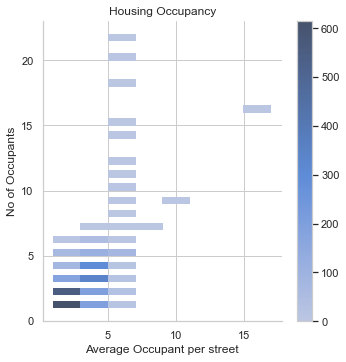

In [117]:
# plotting average occupancy per street against Number of occupants

occupancy_plot = sns.displot(housing_df, 
                             x='Average Occupant per street', 
                             y='No of Occupants', 
                             binwidth=(2, .5),
                             cbar=True)

plt.title('Housing Occupancy')
plt.show()

save_fig['./occupancy_plot.png'] = occupancy_plot

<Figure size 1200x800 with 0 Axes>

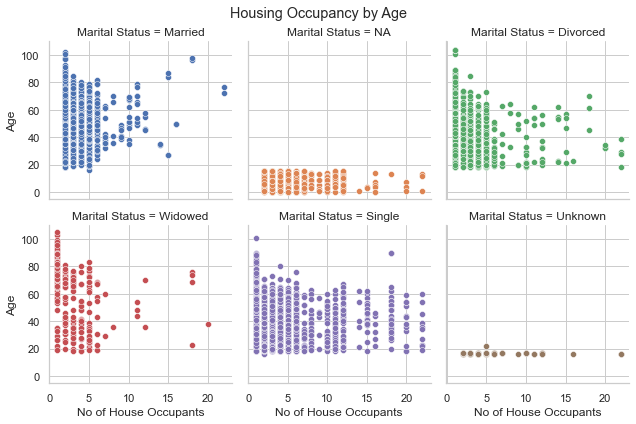

In [118]:
# plotting Number of Occupants per street against Age conditioned by Marital Status

plt.figure(dpi=200)
plot = sns.FacetGrid(df, 
                      col='Marital Status', 
                      hue='Marital Status',
                      col_wrap=3)

plot.map(sns.scatterplot, "No of House Occupants", "Age")
plot.fig.subplots_adjust(top=0.9)
plot.fig.suptitle('Housing Occupancy by Age')


save_fig['./age_occupancy_plot.png'] = plot

### Exporting plots as images

In [119]:
for fig in save_fig:  
    try:
        save_fig[fig].savefig(fig)
        
    # if plot is AxesSubplot
    except AttributeError: 
        save_fig[fig].get_figure().savefig(fig)